<a href="https://colab.research.google.com/github/Supreeta11/bike-sharing-demand-prediction/blob/main/supreeta_kumari__Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime     #importing for date time application
import datetime as dt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from graphviz import Source

from IPython.display import SVG
from IPython.display import display



In [29]:
# Importing the  common libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime     #importing for date time application
import datetime as dt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from graphviz import Source

from IPython.display import SVG
from IPython.display import display


from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb



In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
file_path ="/content/drive/MyDrive/SeoulBikeData.csv"
bike_data=pd.read_csv(file_path,encoding='unicode_escape')


In [46]:
bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [47]:
# dat description for the info
bike_data.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [48]:

bike_data.shape

(8760, 14)

In [50]:

bike_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [51]:
#rename column
bike_data = bike_data.rename(columns={'Rented Bike Count': 'Rented_Bike_Count', 
                        'Temperature(°C)': 'Temperature',
                        'Humidity(%)': 'Humidity', 
                        'Wind speed (m/s)': 'Wind_speed', 
                        'Visibility (10m)': 'Visibility', 
                        'Dew point temperature(°C)': 'Dew_point_temperature', 
                        'Solar Radiation (MJ/m2)': 'Solar_Radiation', 
                        'Rainfall(mm)': 'Rainfall', 
                        'Snowfall (cm)': 'Snowfall',
                        'Functioning Day': 'Functioning_Day'})

In [52]:
bike_data.dtypes

Date                      object
Rented_Bike_Count          int64
Hour                       int64
Temperature              float64
Humidity                   int64
Wind_speed               float64
Visibility                 int64
Dew_point_temperature    float64
Solar_Radiation          float64
Rainfall                 float64
Snowfall                 float64
Seasons                   object
Holiday                   object
Functioning_Day           object
dtype: object

In [53]:
print(bike_data.dtypes.astype(str).value_counts())

float64    6
object     4
int64      4
dtype: int64


In [54]:
# see all the date or diffrent sesaons and holiday and functioning day
print(bike_data['Seasons'].unique())
print(bike_data['Holiday'].unique())
print(bike_data['Functioning_Day'].unique())
print(bike_data['Date'].unique())

['Winter' 'Spring' 'Summer' 'Autumn']
['No Holiday' 'Holiday']
['Yes' 'No']
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'


In [56]:
# data information for null value
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [57]:
# checkng for no null value
bike_data.isnull().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

In [58]:
# checkng for no null value
bike_data.isnull().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

In [59]:
#extarcting all usefull from date formate
bike_data['Date']=pd.to_datetime(bike_data['Date'])
bike_data['Year'] = pd.DatetimeIndex(bike_data['Date']).year
bike_data['Day'] = pd.DatetimeIndex(bike_data['Date']).day
bike_data['Month']= pd.DatetimeIndex(bike_data['Date']).month
bike_data['weekday']=pd.DatetimeIndex(bike_data['Date']).weekday

In [60]:
# data after date time extraction
bike_data.head(2)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Year,Day,Month,weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3


In [61]:
display(bike_data['weekday'].unique())

array([3, 6, 2, 4, 0, 5, 1])

In [62]:
#weekday is in range 0-6, so we need to make it to normal 1-7
bike_data['weekday'] = np.array(bike_data['weekday'])+1
display(bike_data['weekday'].unique())

array([4, 7, 3, 5, 1, 6, 2])

In [63]:
# Rented_bike_per_year = pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Year']).sum()).reset_index().sort_values("Year", ascending=True)
# Rented_bike_per_month = pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Month']).sum()).reset_index().sort_values("Month", ascending=True)
# Rented_bike_per_Day= pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Day']).sum()).reset_index().sort_values("Day", ascending=True)
Rented_bike_per_Weekday= pd.DataFrame(bike_data['Rented_Bike_Count'].groupby(by=bike_data['weekday']).sum()).reset_index().sort_values("weekday", ascending=True)
Rented_bike_per_Weekday

,weekday,Rented_Bike_Count
0,1,863563
1,2,862877
2,3,908871
3,4,928267
4,5,898966
5,6,911475
6,7,798295


In [64]:
# read the data for the year
bike_data['Year'].value_counts()

2018    8016
2017     744
Name: Year, dtype: int64

In [65]:
# year mont count from the data set
bike_data.groupby(['Year','Month']).agg({'Rented_Bike_Count':['sum']}).reset_index()

,Year,Month,Rented_Bike_Count
,,,sum
0,2017,1,9539
1,2017,2,8523
2,2017,3,7222
3,2017,4,8729
4,2017,5,8307
5,2017,6,6669
6,2017,7,8549
7,2017,8,8032
8,2017,9,7233


In [66]:
bike_data['Months_string'] = bike_data['Month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

In [67]:
import plotly.express as px

In [68]:
#line plot for the month_year group
month_year_group= bike_data.groupby(by=['Month','Months_string','Year']).agg({'Rented_Bike_Count':'sum'}).reset_index()
px.line(month_year_group,y= 'Rented_Bike_Count',x= 'Months_string',color= 'Year',title='Total Rented Bikes in 2017 and 2018 on monthly basis',width=1000, height=500)

In [69]:
#bar plot for diffrent year
px.bar(month_year_group,y= 'Rented_Bike_Count',x='Months_string' ,facet_row= 'Year',title='Total Rented Bikes on monthly basis in 2017 and 2018',width=800, height=600)


In [70]:
#bar plot for diffrent year
px.bar(month_year_group,y= 'Rented_Bike_Count',x='Months_string' ,facet_row= 'Year',title='Total Rented Bikes on monthly basis in 2017 and 2018',width=800, height=600)


In [71]:
# histogram  plot for the rented bike and year
px.histogram(bike_data, x="Rented_Bike_Count",marginal="violin",color='Year')

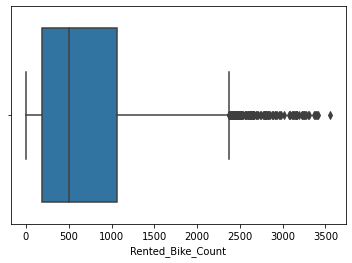

In [72]:
sns.boxplot(x = bike_data['Rented_Bike_Count'])

In [73]:
#square root transformation
px.histogram(bike_data, x=np.sqrt(bike_data["Rented_Bike_Count"]),color='Year',marginal="violin", title='Probalility density of Square root transformation of Number of Rented Bikes',histnorm='probability density')

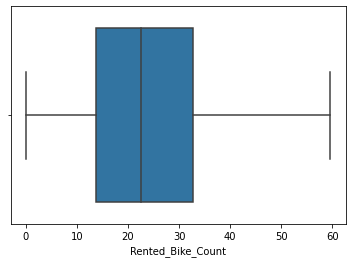

In [74]:
sns.boxplot(x = np.sqrt(bike_data["Rented_Bike_Count"]))

In [75]:
bike_data.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Year',
       'Day', 'Month', 'weekday', 'Months_string'],
      dtype='object')

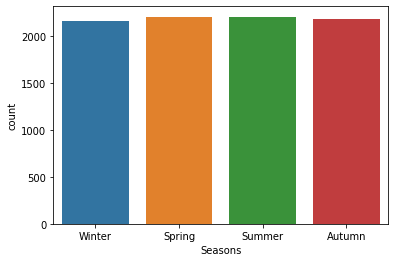

In [76]:
#count plot for diffrent seasons
sns.countplot(x ='Seasons', data = bike_data)

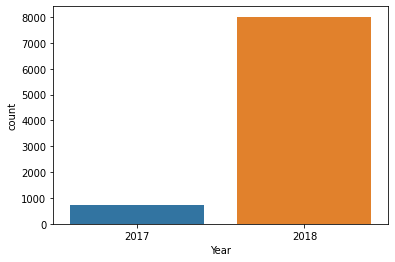

In [77]:
#comment for countplot for year
sns.countplot(x ='Year', data = bike_data)


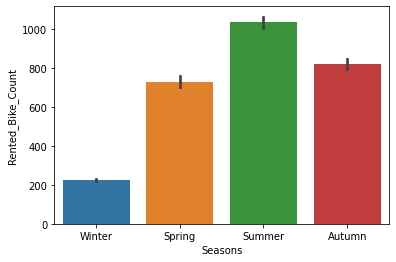

In [78]:
#Finding relation betwwen seasons and rented bike count. telling us rented bike count on that season.
# sns.set_style('darkgrid')
sns.barplot(x ='Seasons', y ='Rented_Bike_Count', data = bike_data, palette ='tab10')


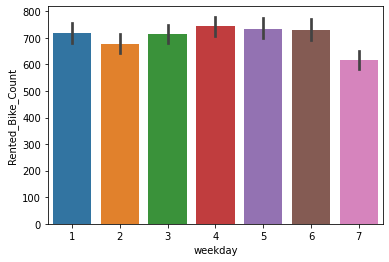

In [79]:
#plot for the rented bike forweekday
sns.barplot(x ='weekday', y ='Rented_Bike_Count', data = bike_data, palette ='tab10')


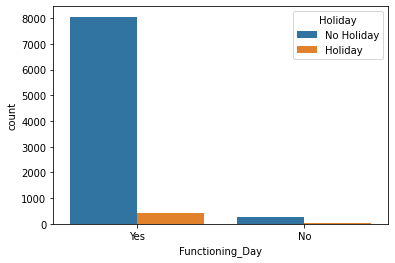

In [80]:
#holiday or not holiday plot
sns.countplot(x ='Functioning_Day',hue = 'Holiday', data = bike_data)


In [81]:
bike_data.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Year',
       'Day', 'Month', 'weekday', 'Months_string'],
      dtype='object')

In [82]:
#selecting numerical features
numerical_features = ['Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall' ]

In [83]:
# List of colors in the color palettes
rgb_values = sns.color_palette("bright")

In [84]:
# Map continents to the colors
color_map = dict(zip(numerical_features, rgb_values))

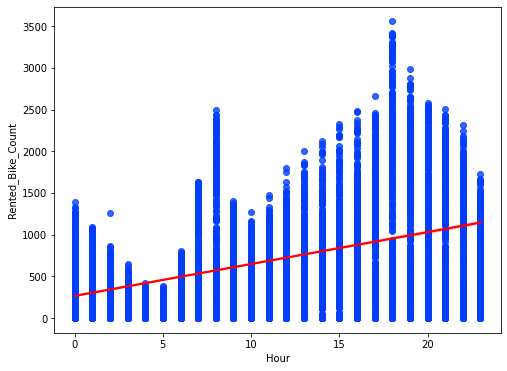

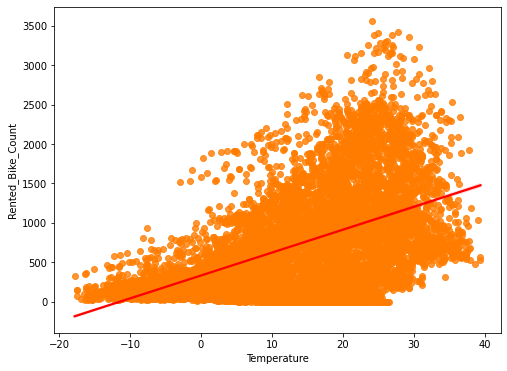

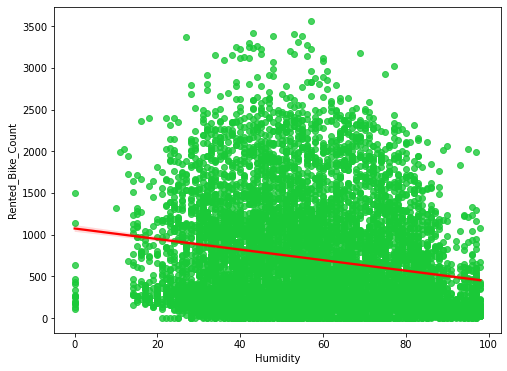

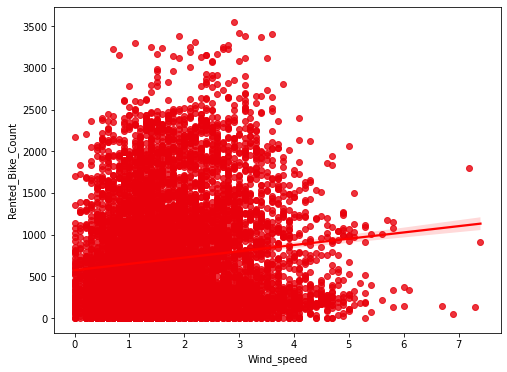

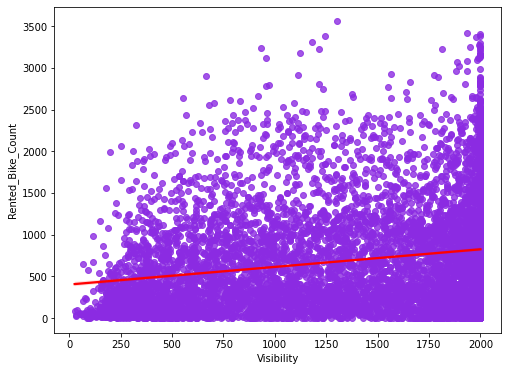

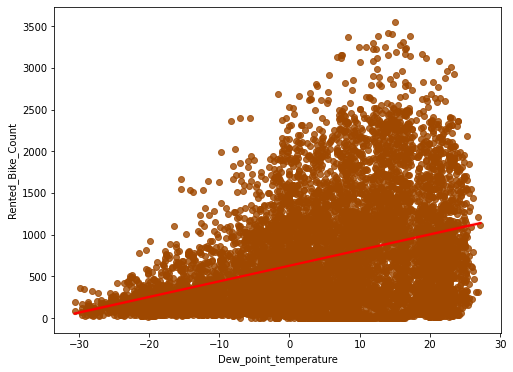

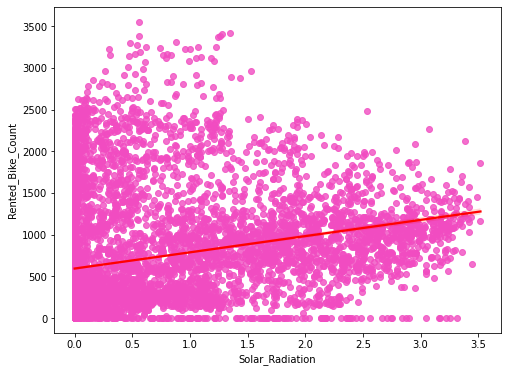

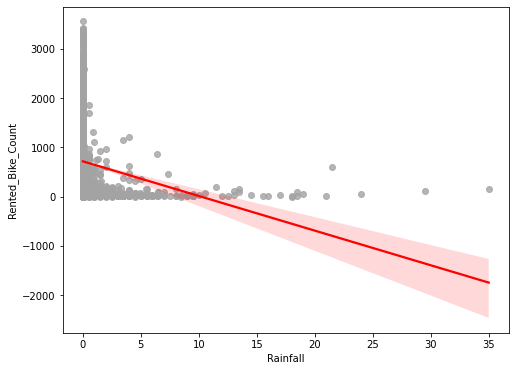

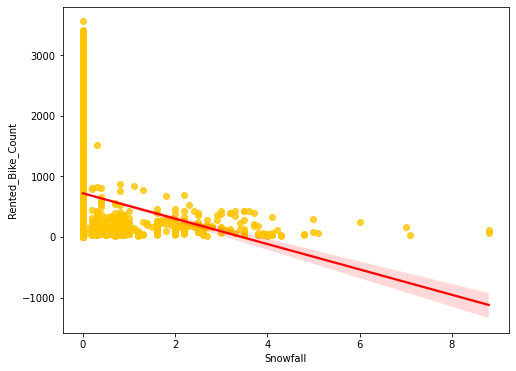

In [85]:
#plot for numerical feature
plt.rcParams['figure.figsize'] = (8, 6)
for col, key in zip(numerical_features, color_map):
  plt.figure()
  sns.regplot(x=bike_data[col], y = bike_data['Rented_Bike_Count'],scatter_kws={"color": color_map[key]}, line_kws={"color": "Red"})

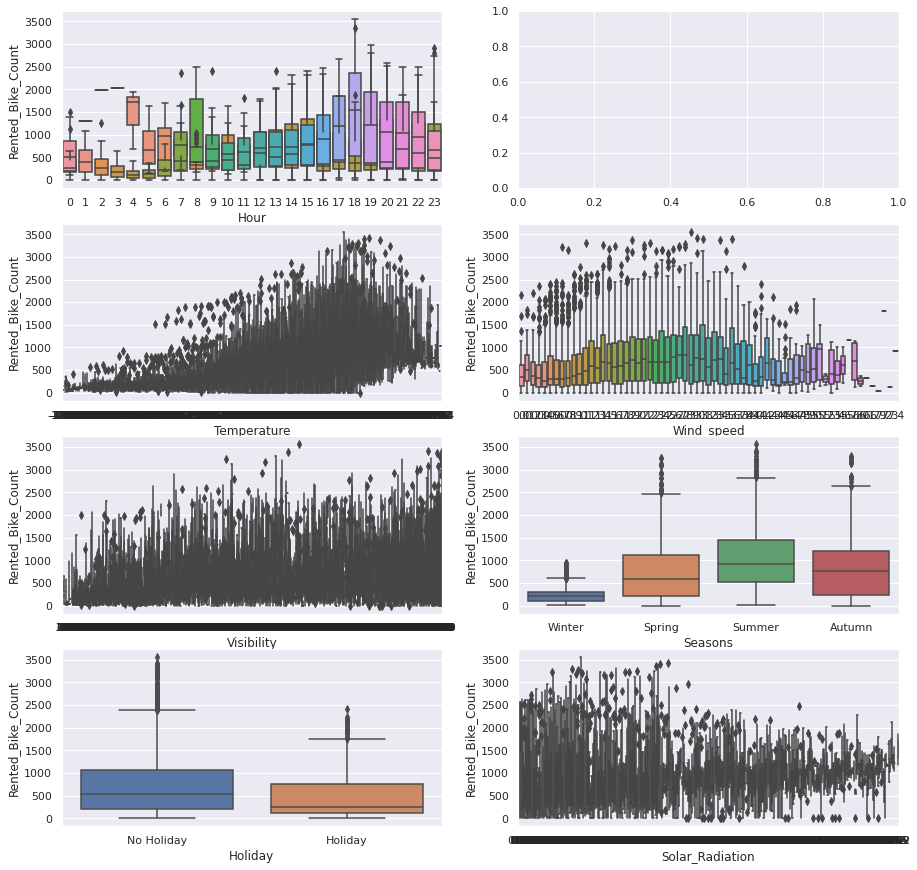

In [86]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 15)

sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Humidity",orient="v",ax=axes[0][0])
sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Hour",orient="v",ax=axes[0][0])
sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Temperature",orient="v",ax=axes[1][0])
sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Wind_speed",orient="v",ax=axes[1][1])
sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Visibility",orient="v",ax=axes[2][0])
sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Seasons",orient="v",ax=axes[2][1])
sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Holiday",orient="v",ax=axes[3][0])
sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Solar_Radiation",orient="v",ax=axes[3][1])